<a href="https://colab.research.google.com/github/noornobi133/Personal-Expense-Tracker/blob/main/personal_expense_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 1
Enter date (YYYY-MM-DD): 2024-09-25
Enter category: food
Enter amount: 200
Enter description: for breakfast
Expense saved successfully!

--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 2
Date       | Category    | Amount  | Description
-----------------------------------------------
2024-09-25 | food       | 200.0   | for breakfast

--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 1
Enter date (YYYY-MM-DD): 2024-09-26
Enter category: rent
Enter amount: 60
Enter description: for a day 
Expense saved successfully!

--- Personal Expense Tracker ---
1. Add Expense
2. View Expens

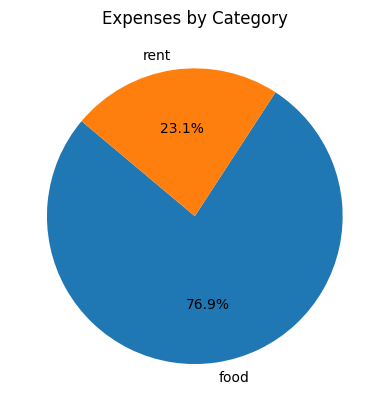


--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 5
1. Pie Chart
2. Bar Chart
3. Line Chart
Enter your choice: 2


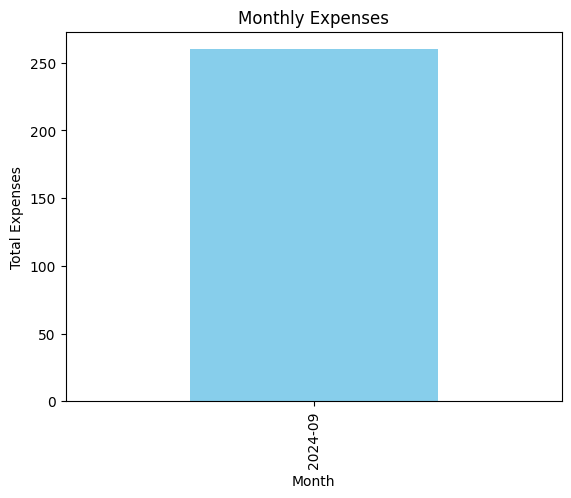


--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 5
1. Pie Chart
2. Bar Chart
3. Line Chart
Enter your choice: 3
Enter month (YYYY-MM): 2024-09


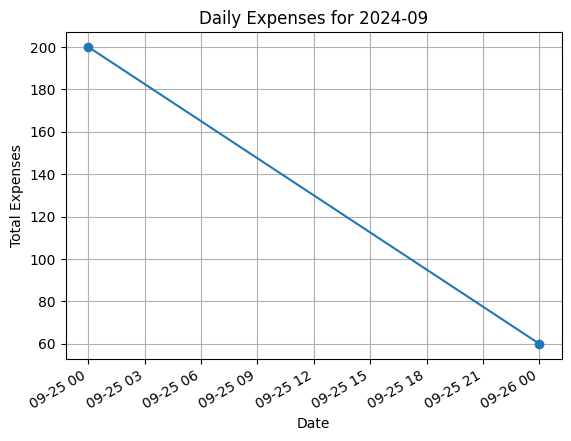


--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 6
Highest Expense: 200.0
Lowest Expense: 60.0
Average Expense: 130.00
Day with Highest Expense: 2024-09-25 00:00:00 ($200.0)
Day with Lowest Expense: 2024-09-26 00:00:00 ($60.0)

--- Personal Expense Tracker ---
1. Add Expense
2. View Expenses
3. Delete Expense
4. Generate Summary
5. Visualization
6. Statistical Analysis
7. Exit
Enter your choice: 7
Exiting... Goodbye!


In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# File Handling
def save_expense_to_csv(date, category, amount, description, filename='expenses.csv'):
    try:
        with open(filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([date, category, amount, description])
            print("Expense saved successfully!")
    except Exception as e:
        print(f"Error saving expense: {e}")

def read_expenses_from_csv(filename='expenses.csv'):
    try:
        with open(filename, mode='r') as file:
            reader = csv.reader(file)
            print("Date       | Category    | Amount  | Description")
            print("-----------------------------------------------")
            for row in reader:
                print(f"{row[0]} | {row[1]:<10} | {row[2]:<7} | {row[3]}")
    except FileNotFoundError:
        print("No expenses found. Please add some expenses first.")
    except Exception as e:
        print(f"Error reading expenses: {e}")

def load_expenses(filename='expenses.csv'):
    try:
        return pd.read_csv(filename, names=["Date", "Category", "Amount", "Description"])
    except FileNotFoundError:
        print("CSV file not found.")
        return pd.DataFrame()

# Data Validation
def validate_date(date):
    pattern = r'^\d{4}-\d{2}-\d{2}$'
    if re.match(pattern, date):
        return True
    print("Invalid date format. Use YYYY-MM-DD.")
    return False

def validate_amount(amount):
    try:
        return float(amount)
    except ValueError:
        print("Invalid amount. Please enter a numeric value.")
        return None

# Visualization
def plot_pie_chart(expenses):
    category_sum = expenses.groupby("Category")["Amount"].sum()
    category_sum.plot(kind="pie", autopct='%1.1f%%', startangle=140)
    plt.title("Expenses by Category")
    plt.ylabel("")
    plt.show()

def plot_bar_chart(expenses):
    expenses["Date"] = pd.to_datetime(expenses["Date"])
    expenses["Month"] = expenses["Date"].dt.to_period("M")
    monthly_sum = expenses.groupby("Month")["Amount"].sum()
    monthly_sum.plot(kind="bar", color="skyblue")
    plt.title("Monthly Expenses")
    plt.xlabel("Month")
    plt.ylabel("Total Expenses")
    plt.show()

def plot_line_chart(expenses, month):
    expenses["Date"] = pd.to_datetime(expenses["Date"])
    monthly_data = expenses[expenses["Date"].dt.to_period("M") == month]
    daily_sum = monthly_data.groupby("Date")["Amount"].sum()
    daily_sum.plot(kind="line", marker='o')
    plt.title(f"Daily Expenses for {month}")
    plt.xlabel("Date")
    plt.ylabel("Total Expenses")
    plt.grid()
    plt.show()

# Functions
def delete_expense(description, filename='expenses.csv'):
    try:
        expenses = pd.read_csv(filename, names=["Date", "Category", "Amount", "Description"])
        updated_expenses = expenses[expenses["Description"] != description]
        updated_expenses.to_csv(filename, index=False, header=False)
        print("Expense deleted successfully.")
    except Exception as e:
        print(f"Error deleting expense: {e}")

def generate_summary(expenses):
    print("Category-wise Total Expenses:")
    print(expenses.groupby("Category")["Amount"].sum())
    print("\nOverall Total Expenses:", expenses["Amount"].sum())

# Statistical Analysis
def calculate_statistics(expenses):
    amounts = expenses["Amount"].values
    print(f"Highest Expense: {np.max(amounts)}")
    print(f"Lowest Expense: {np.min(amounts)}")
    print(f"Average Expense: {np.mean(amounts):.2f}")

def spending_trends(expenses):
    expenses["Date"] = pd.to_datetime(expenses["Date"])
    daily_sum = expenses.groupby("Date")["Amount"].sum()
    print(f"Day with Highest Expense: {daily_sum.idxmax()} (${daily_sum.max()})")
    print(f"Day with Lowest Expense: {daily_sum.idxmin()} (${daily_sum.min()})")

# User Interaction
def menu():
    while True:
        print("\n--- Personal Expense Tracker ---")
        print("1. Add Expense")
        print("2. View Expenses")
        print("3. Delete Expense")
        print("4. Generate Summary")
        print("5. Visualization")
        print("6. Statistical Analysis")
        print("7. Exit")
        choice = input("Enter your choice: ")

        if choice == "1":
            date = input("Enter date (YYYY-MM-DD): ")
            if not validate_date(date):
                continue
            category = input("Enter category: ")
            amount = input("Enter amount: ")
            amount = validate_amount(amount)
            if amount is None:
                continue
            description = input("Enter description: ")
            save_expense_to_csv(date, category, amount, description)
        elif choice == "2":
            read_expenses_from_csv()
        elif choice == "3":
            desc = input("Enter description of expense to delete: ")
            delete_expense(desc)
        elif choice == "4":
            expenses = load_expenses()
            generate_summary(expenses)
        elif choice == "5":
            expenses = load_expenses()
            print("1. Pie Chart")
            print("2. Bar Chart")
            print("3. Line Chart")
            viz_choice = input("Enter your choice: ")
            if viz_choice == "1":
                plot_pie_chart(expenses)
            elif viz_choice == "2":
                plot_bar_chart(expenses)
            elif viz_choice == "3":
                month = input("Enter month (YYYY-MM): ")
                plot_line_chart(expenses, month)
            else:
                print("Invalid choice.")
        elif choice == "6":
            expenses = load_expenses()
            calculate_statistics(expenses)
            spending_trends(expenses)
        elif choice == "7":
            print("Exiting... Goodbye!")
            break
        else:
            print("Invalid choice. Try again.")

# Run the program
menu()